# Computations with numpy

This week, we will continue to work with `numpy` as a scientific tool and calculator. You will learn about tools and strategies which are used very often in scientific applications, in particular in geosciences.

In [1]:
import numpy as np

## Element-wise operations 

This is a reminder from last week. Arithmetic and comparison operators act on numpy arrays in an element-by-element fashion. When the array sizes don't match, broadcasting is used to make it work where possible. Make sure you understand what each of the examples below are doing:

In [2]:
a = np.arange(1, 10, 2)
a

array([1, 3, 5, 7, 9])

In [3]:
a + a

array([ 2,  6, 10, 14, 18])

In [4]:
a * 2

array([ 2,  6, 10, 14, 18])

In [5]:
a**2

array([ 1,  9, 25, 49, 81])

In [6]:
a >= 5

array([False, False,  True,  True,  True])

In [7]:
(a >= 5) & (a <= 7)

array([False, False,  True,  True, False])

## Element-wise mathematical functions  

There are [plenty](https://numpy.org/doc/stable/reference/routines.math.html) of functions applying operations on numpy arrays in an element-by-element fashion. Let's pick some examples:

In [8]:
angle = np.array([0, 45, 90, 135, 180])
rads = np.deg2rad(angle)
np.cos(rads)

array([ 1.00000000e+00,  7.07106781e-01,  6.12323400e-17, -7.07106781e-01,
       -1.00000000e+00])

In [9]:
np.sqrt([4, 16, 36])

array([2., 4., 6.])

*Note: many numpy functions accepts python lists as input. The reason is that they assume you want to manipulate arrays, and they are converting them to arrays for you. It the same when doing additions: the lists are converted to `ndarrays` when necessary. For example:*

In [10]:
angle + [0, 45, 90, 135, 180]

array([  0,  90, 180, 270, 360])

## Statistical functions  

There are also [a lot of numpy functions](https://numpy.org/doc/stable/reference/routines.statistics.html) which take an array as input and compute various statistics on them, often used for "data reduction" (summarizing the data in less numbers). Let's highlight some of them:

In [11]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
np.sum(a)

np.int64(66)

In [13]:
np.mean(a)

np.float64(5.5)

In the one dimensional case, `np.mean` is the equivalent of:

In [14]:
np.sum(a) / a.size

np.float64(5.5)

In [15]:
np.std(a)

np.float64(3.452052529534663)

[np.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html) computes the standard deviation of an array. 

Some statistical functions are also "attached" to arrays for convenience. For example, the two calls below are equivalent (with one difference: if you are curious, ask me in class!):

In [16]:
a.sum(), np.sum(a)

(np.int64(66), np.int64(66))

In [17]:
a.std(), np.std(a)

(np.float64(3.452052529534663), np.float64(3.452052529534663))

## Working with missing data

Unfortunately, sometimes the data delivered from the stations is missing. In this case, the data provider may decide to replace missing values with a special number, for example -9.9, -999.9, etc...

This practice is vary common (for reasons I'm happy to explain in class), but it also have one main problem: numpy or matplotlib do not know that these are wrong or missing. More problematically, the value is often even a valid one in theory: -99.9 for example is a valid temperature value in °C (even if very rare at the surface). 

Here is what happens when this occurs in these (fake) temperature measurements for example:

In [18]:
# Create some data
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x) * 12

# Some is missing
y[30:70] = -99.9

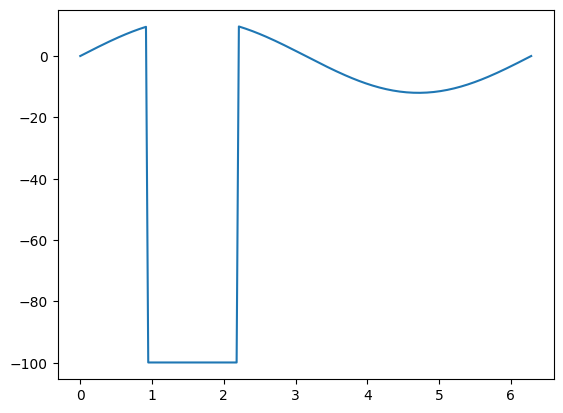

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(x, y);

Depending on your use case, you two main options available to you:
- replacing missing values with NaNs
- filtering the missing values

Each of these two options have pros and cons.

### Working with NaNs 

"Not A Number" (`NaN`) is a special floating point number in numpy. **It works ONLY with floats, not with ints.** You can replace float values in arrays with NaNs very easily:

In [20]:
y[y == -99.9] = np.nan

The advantage of this method is that the time axis does not change, and that matplotlib knows not to display this data: 

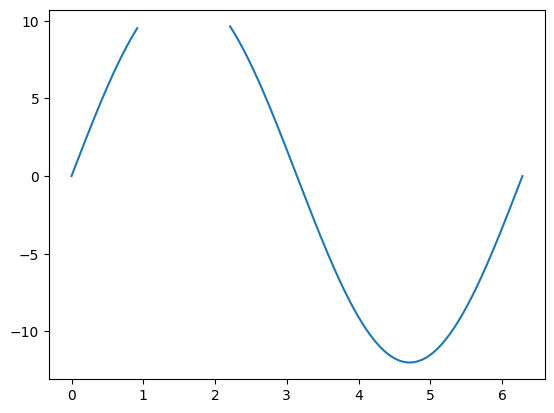

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y);

NaNs can actually happen after invalid mathematical operations. They are also propagating through operations, which is a very useful feature and prevents unexpected errors: 

In [22]:
a = np.array([1, 0, 3])
b = np.array([-2, 0, 2])
c = a / b
c

C:\Users\c7151096\AppData\Local\Temp\ipykernel_11104\4230832818.py:3: RuntimeWarning: invalid value encountered in divide
  c = a / b


array([-0.5,  nan,  1.5])

In [23]:
d = c + 3
d

array([2.5, nan, 4.5])

This propagation also happens in numpy statistical functions (this is a feature, not a bug):

In [24]:
np.mean(d)

np.float64(nan)

This happens because it's not clear in this example whether you want the average of `[2.5, 4.5]` or whether you actually want the average of three values without knowing that one is invalid. Numpy here is conservative and makes sure there is no ambiguity.

If you know what you are doing and are happy to compute statistics even if some numbers are missing, you can use:

In [25]:
np.nanmean(d)

np.float64(3.5)

Many functions are available in their "`nan` equivalent":

In [26]:
np.nanmax(d), np.nanstd(d)

(np.float64(4.5), np.float64(1.0))

### Filtering the data 

Another way to deal with NaNs is to remove them (filter them) from the data. This can be achieved with boolean indexing:

In [27]:
d

array([2.5, nan, 4.5])

In [28]:
np.isfinite(d)

array([ True, False,  True])

In [29]:
d[np.isfinite(d)]

array([2.5, 4.5])

**If you apply this strategy to real world data with coordinates (e.g. time), don't forget to select also the correct coordinate.** For example, let's get back to our previous use case:

In [30]:
# Create some data
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x) * 12

# Some is missing
y[30:70] = -99.9

The correct way to select both the coorinates and the values is:

In [31]:
# Valid positions
is_valid = y != -99.9

# Boolean indexing
x_filtered = x[is_valid]
y_filtered = y[is_valid]

# Usual statistics
np.mean(y_filtered)

np.float64(-2.8045859518297673)

The drawback of this approach is that the coordinates are not monotonously increasing anymore. There is a "gap", that matplotlib fills with a line when asked to plot the data:

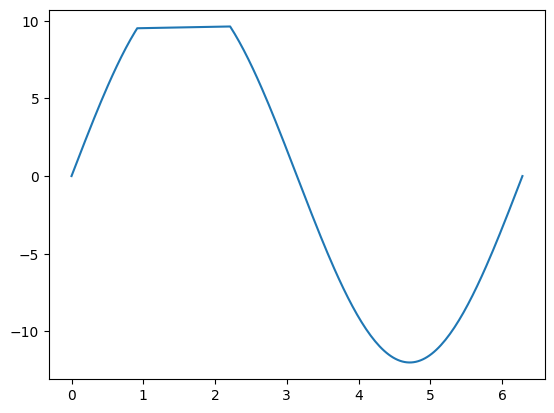

In [32]:
fig, ax = plt.subplots()
ax.plot(x_filtered, y_filtered);

Depending on the situation, this can be misleading.

## Learning checklist 

<label><input type="checkbox" id="week05_01" class="box"> I understand what element-wise operations are. I am aware of basic numpy operations (e.g. "+") and functions (e.g. `np.sin`) operating element-wise.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I understand that numpy also offers many statistical functions, often summarizing the data in seful statistics (e.g. the mean, standard deviation, etc.).</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I am aware of the existence of the special number "Not A Number" in numpy.</input></label><br>
<label><input type="checkbox" id="week05_01" class="box"> I have learned some strategies to deal with missing data in numpy.</input></label><br>